# Basic codes for Computer Vision

## To load the image

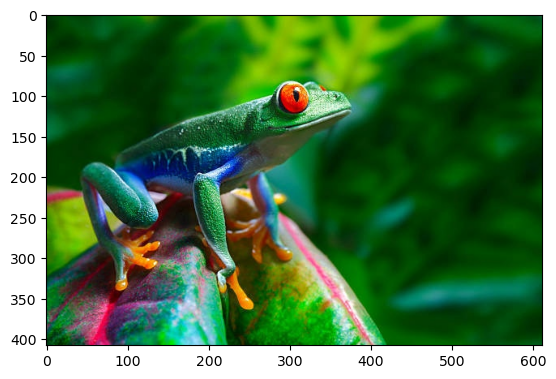

In [1]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("frog.jpg")
plt.imshow(image)

## To get the image in original colours

This code converts an image from BGR (OpenCV default) to RGB (Matplotlib standard) so colors display correctly, then shows it with a title and grid lines using axis ticks.

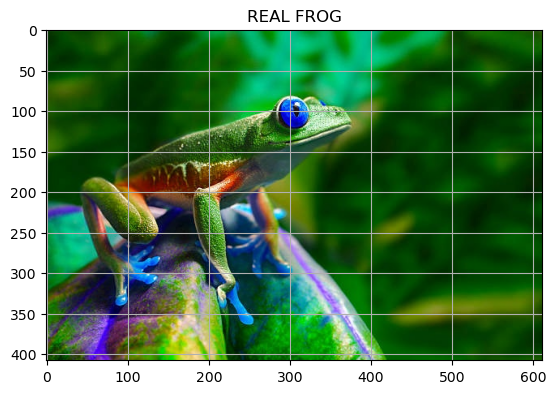

In [2]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.grid(True)
plt.title("REAL FROG")
plt.imshow(image_rgb)

This code prints the image’s height, width, and number of color channels

In [3]:
print("Image height: ",image.shape[0])
print("Image Width: ",image.shape[1])
print("Image Channels: ",image.shape[2])

Image height:  408
Image Width:  612
Image Channels:  3


## To convert it into Gray

This code converts the image to grayscale and displays it with a title using a gray colormap.

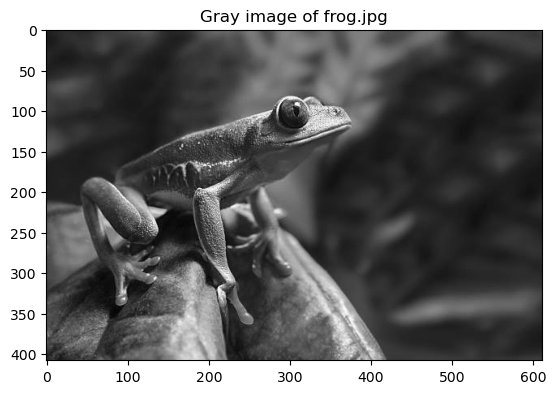

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title("Gray image of frog.jpg")
plt.imshow(image_gray, cmap="gray")

## To save an converted image

In [5]:
cv2.imwrite("frog_copy.jpg",image_gray)

True

## For Gray Level Reduction

This code reduces the number of gray levels in the image, so instead of smooth shades, you get fewer shades (like pure black and white when level = 1).

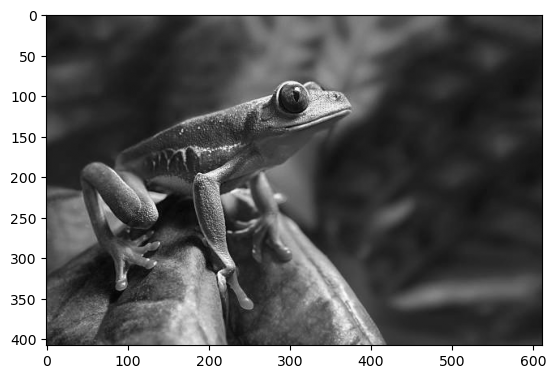

In [6]:
import numpy as np
level = 1
quantized = np.floor(image_gray/(level/256)*level/256)
quantized = quantized.astype("uint8")
plt.imshow(quantized,cmap="gray")

## Splitting and Displaying RGB Color Channels

This code extracts the Blue, Green, and Red channels from the RGB image separately and shows them side by side in grayscale.

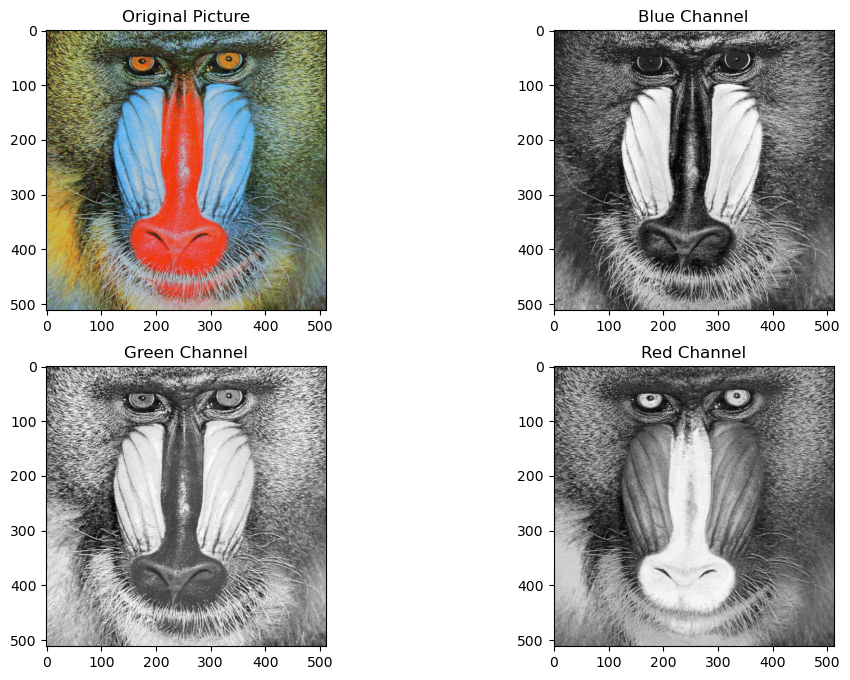

In [7]:
img = cv2.imread("mandril_color.tif")
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blue_channel = img[:, :, 0]
green_channel = img[:, :, 1]
red_channel = img[:, :, 2]
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.imshow(rgb_img)
plt.title("Original Picture")
plt.subplot(2, 2, 2)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.subplot(2, 2, 4)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.show()

This code shows how variable assignment (A = image) shares the same data (same ID), while .copy() creates a new separate image in memory with a different ID.

In [8]:
image = cv2.imread("mandril_color.tif")
A= image
B= image.copy()
print("Orginal ID: ",id(image))
print("ID of A image: ",id(A))
print("ID of B image: ",id(B))

Orginal ID:  2055627483216
ID of A image:  2055627483216
ID of B image:  2055587419632


## Image Flipping and Multiple Rotations

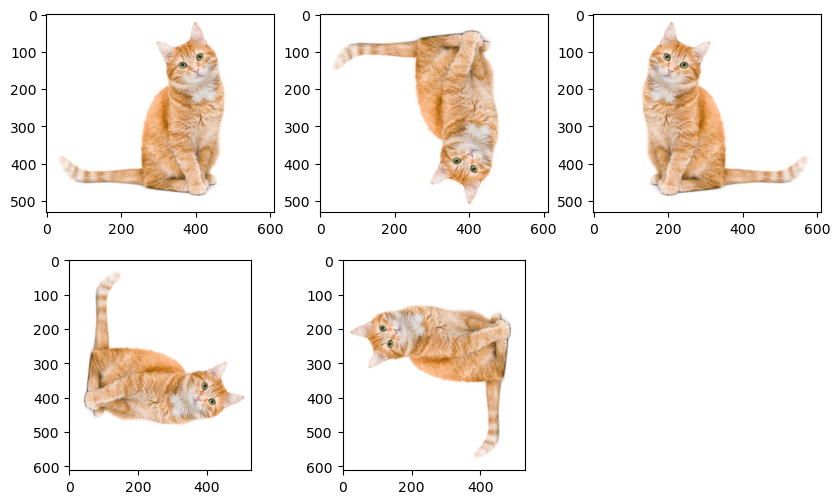

In [9]:
pic = cv2.imread("cat.jpg")
pic_rgb = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
plt.imshow(pic_rgb)
plt.subplot(2,3,2)
flip_ver = cv2.flip(pic,0)
plt.imshow(cv2.cvtColor(flip_ver,cv2.COLOR_BGR2RGB))
plt.subplot(2,3,3)
flip_hor= cv2.flip(pic,1)
plt.imshow(cv2.cvtColor(flip_hor,cv2.COLOR_BGR2RGB))
plt.subplot(2,3,4)
cat_rotate = cv2.rotate(pic,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(cv2.cvtColor(cat_rotate,cv2.COLOR_BGR2RGB))
plt.subplot(2,3,5)
cat_rotate2 = cv2.rotate(pic,cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(cv2.cvtColor(cat_rotate2,cv2.COLOR_BGR2RGB))

## To Crop

This code loads an image, then crops a specific region by selecting rows 35–110 and columns 60–200, and shows the original and cropped parts side by side.
image[rows, columns] = image[height, width] = image[startY:endY, startX:endX] (all mean the same for cropping).

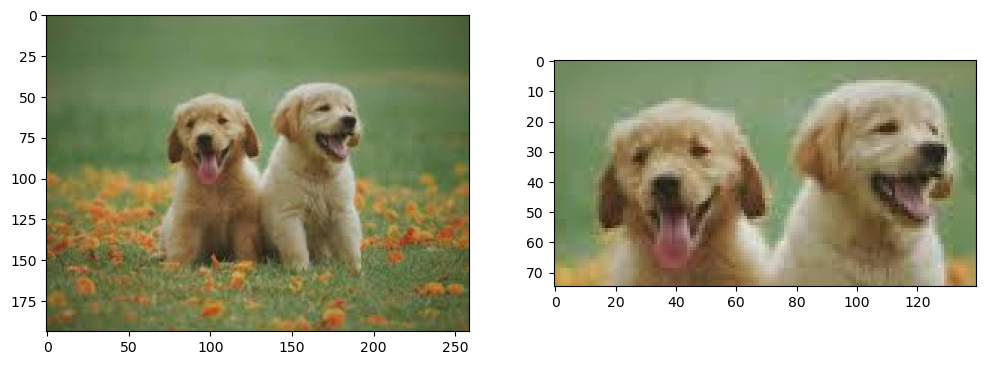

In [10]:
picture = cv2.imread("puppies.jpeg")
crop = picture[35:110,60:200]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(picture,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(crop,cv2.COLOR_BGR2RGB))

## Changing Specific Image Pixels

Create blank image: blank = np.zeros((height, width, 3), dtype=np.uint8)

Draw rectangle: cv2.rectangle(blank, (x1,y1), (x2,y2), (B,G,R), thickness)

Fill region: blank[startY:endY, startX:endX] = [B,G,R]

Draw circle: cv2.circle(blank, (centerX, centerY), radius, (B,G,R), thickness)

Draw line: cv2.line(blank, (x1,y1), (x2,y2), (B,G,R), thickness)

Draw polygon outline: cv2.polylines(blank, [points], isClosed, (B,G,R), thickness)

Draw filled polygon: cv2.fillPoly(blank, [points], (B,G,R))

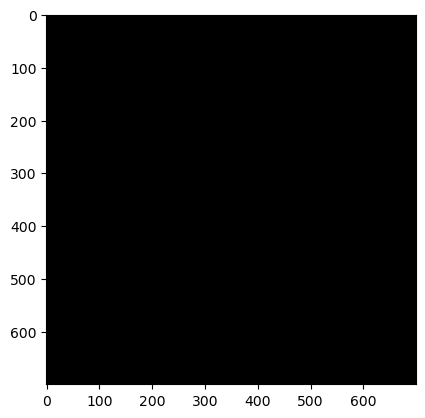

In [11]:
blank = np.zeros((700,700,3),dtype=np.uint8)
plt.imshow(blank)

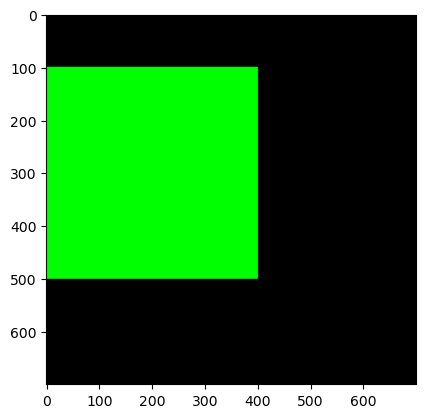

In [12]:
cv2.rectangle(blank, (0, 100), (400, 500), (0, 255, 0), -1)
plt.imshow(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))

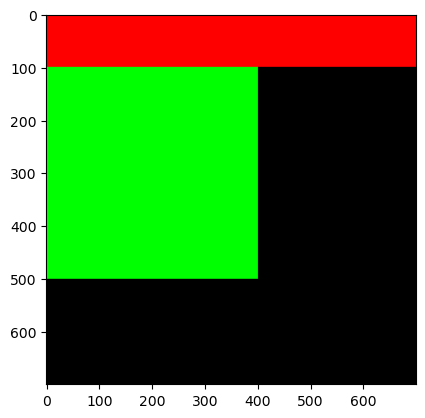

In [13]:
blank[0:100,:] = [0,0,255]
plt.imshow(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))

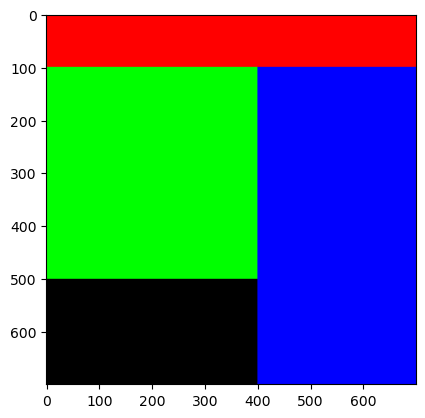

In [14]:
blank[100:700,400:700] = [255,0,0]
plt.imshow(cv2.cvtColor(blank,cv2.COLOR_BGR2RGB))

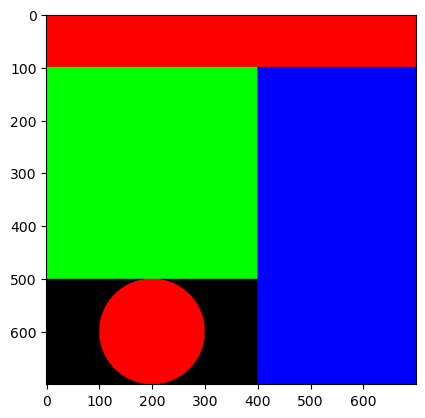

In [15]:
cv2.circle(blank, (200, 600), 100, (0, 0, 255), -1)  
plt.imshow(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))

## To write Text

cv2.putText(image, 'Your Text', (x, y), font, fontScale, (B, G, R), thickness)

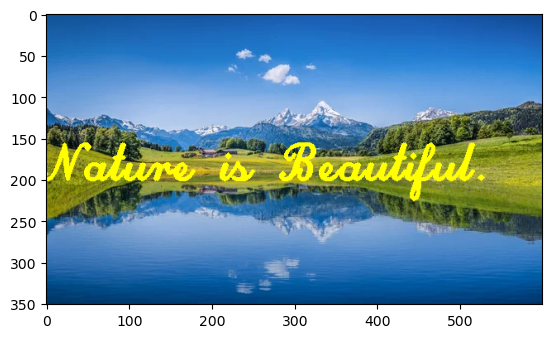

In [16]:
image = cv2.imread("nature.jpg")
cv2.putText(image, 'Nature is Beautiful.', (0, 200), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 2, (0, 255, 255), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Image Histogram

An image histogram shows how pixel intensities are distributed in an image, it plots how many pixels have each brightness value from black (0) to white (255). This helps analyze contrast, brightness, and overall exposure

Calculate the pixel intensity histogram of the image
hist = cv2.calcHist([image], [channel], None, [numBins], [range])

Plot the histogram as a line graph for smooth curve
plt.plot(hist)

Make X-axis values for bar plot (0 to numBins)
x = range(numBins)

Plot the histogram as a bar chart for clear bin visualization
plt.bar(x, hist[:, 0], width=1.0, color='blue')

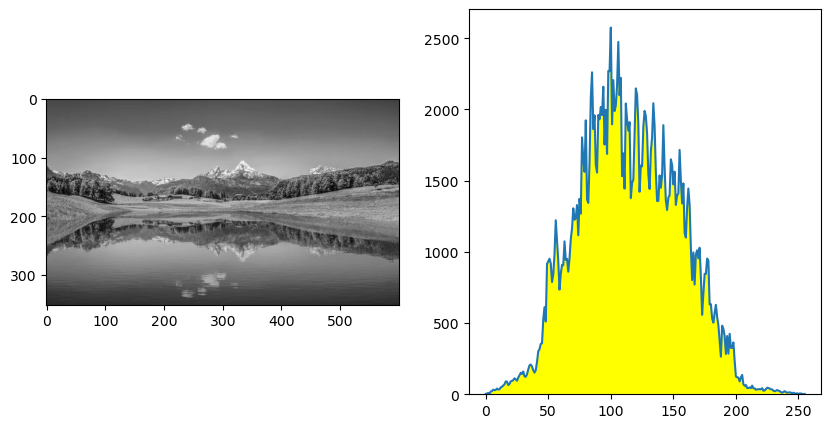

In [17]:
img = cv2.imread("nature.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.subplot(1,2,2)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
x = range(256)
plt.bar(x, hist[:,0], width=1.0, color='yellow') 
plt.show()

## Image Negative Transformation

Create negative image by inverting pixel values :negative = 255 - b
An image negative is created by inverting all the pixel intensities, bright areas become dark and dark areas become bright. This is commonly used in photography and image processing to highlight details that may be hard to see in the original image

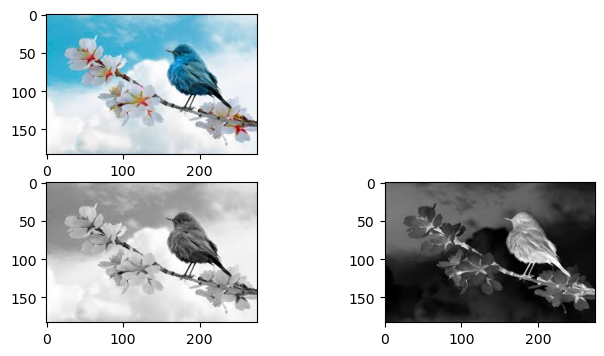

In [18]:
a = cv2.imread("bird.jpeg")
b = cv2.imread("bird.jpeg",cv2.IMREAD_GRAYSCALE)
negative = 255 - b
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(a,cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.imshow(b,cmap="gray")
plt.subplot(2,2,4)
plt.imshow(negative,cmap="gray")

## Brightness and Contrast Adjustment

Brightness and contrast adjustment changes how light or dark an image appears and how strong the difference is between dark and bright areas. It’s used to improve visibility, highlight details, or prepare images for further processing. Use alpha to control contrast (>1 = more contrast) and beta to control brightness (positive = brighter). cv2.convertScaleAbs() safely applies both and keeps pixel values valid.

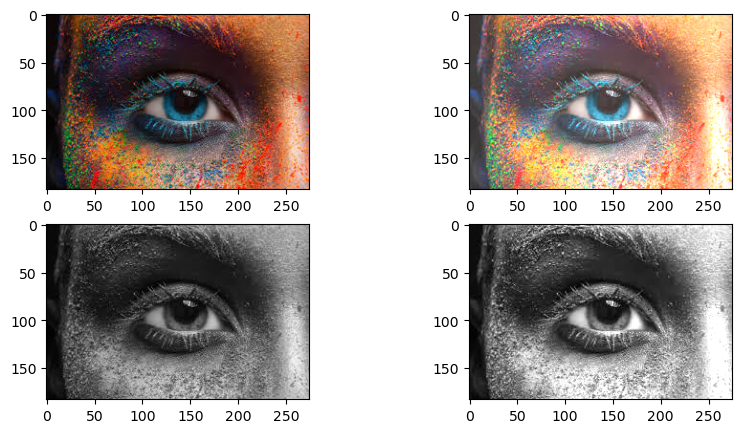

In [19]:
x = cv2.imread("eye.jpeg")
y = cv2.imread("eye.jpeg",cv2.IMREAD_GRAYSCALE)
a = 1.2
b = 50
adjusted_colour = cv2.convertScaleAbs(x, alpha=a, beta=b)
adjusted_gray = cv2.convertScaleAbs(y, alpha=a, beta=b)
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(adjusted_colour,cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.imshow(y, cmap="gray")
plt.subplot(2,2,4)
plt.imshow(adjusted_gray,cmap="gray")

## Histogram Equalization
Histogram equalization improves the contrast of an image by spreading out pixel intensity values more evenly across the full range. This makes dark areas brighter and bright areas clearer, revealing hidden details. cv2.equalizeHist() spreads pixel values across the full range, original image stays dull, equalized image pops with clear contrast. plt.hist(image.ravel(), numBins, [min, max]) it shows how pixel intensities are distributed in an image.

C:\Users\ttahz\AppData\Local\Temp\ipykernel_10816\3309220573.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(B.ravel(), 256, [0, 256])
C:\Users\ttahz\AppData\Local\Temp\ipykernel_10816\3309220573.py:16: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(adjust.ravel(), 256, [0, 256])


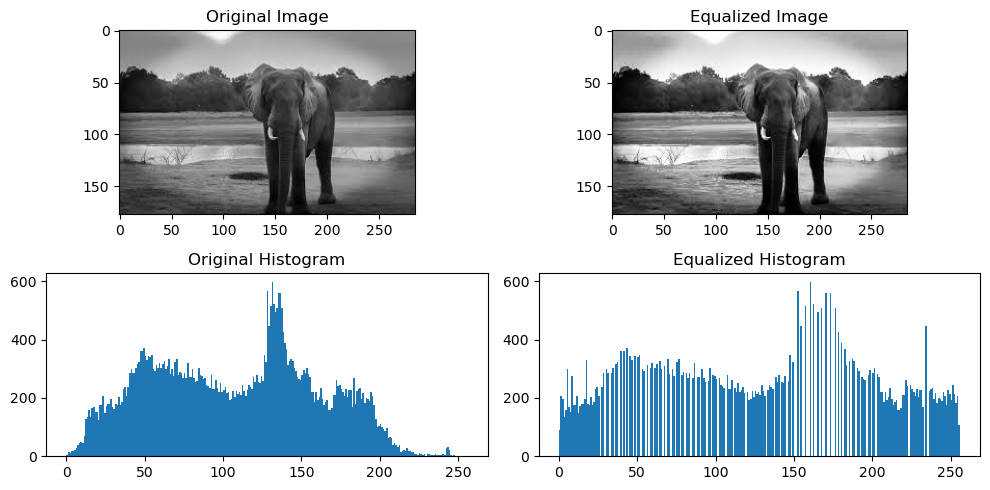

In [20]:
import cv2
import matplotlib.pyplot as plt
B = cv2.imread("elephant.jpeg", cv2.IMREAD_GRAYSCALE)
adjust = cv2.equalizeHist(B)
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(B, cmap="gray")
plt.title("Original Image")
plt.subplot(2, 2, 2)
plt.imshow(adjust, cmap="gray")
plt.title("Equalized Image")
plt.subplot(2, 2, 3)
plt.hist(B.ravel(), 256, [0, 256])
plt.title("Original Histogram")
plt.subplot(2, 2, 4)
plt.hist(adjust.ravel(), 256, [0, 256])
plt.title("Equalized Histogram")
plt.tight_layout()
plt.show()

## Image Thresholding
Thresholding converts a grayscale image to a binary image, pixels above a threshold become white (1), pixels below become black (0). It’s used for separating objects from the background.

ret, thresh_img = cv2.threshold(image, threshold_value, max_value, method)

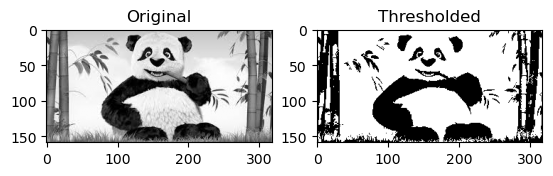

In [21]:
o = cv2.imread("panda.jpeg",cv2.IMREAD_GRAYSCALE)
ret, thresh_img = cv2.threshold(o, 127 , 255 , cv2.THRESH_BINARY)
plt.subplot(1,2,1)
plt.imshow(o, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(thresh_img, cmap="gray")
plt.title("Thresholded")
plt.show()

Otsu’s Thresholding automatically calculates the best threshold value to separate foreground and background in a grayscale image, making it easier than picking a threshold manually. Use cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) to apply it in one step.

## Image Resizing
Image resizing changes an image’s width and height by scaling it up or down. This is useful for standardizing image sizes, zooming, or fitting images into specific layouts in computer vision tasks.

This code loads an image and resizes it in two ways: the first scales width by 2 (fx=2) and keeps height same (fy=1); the second keeps width same (fx=1) but doubles the height (fy=2). Both use cv2.INTER_CUBIC for smoother results. The resized and original images are shown side by side for comparison.

cv2.resize(image, None, fx, fy, interpolation) → fx = width scale, fy = height scale.

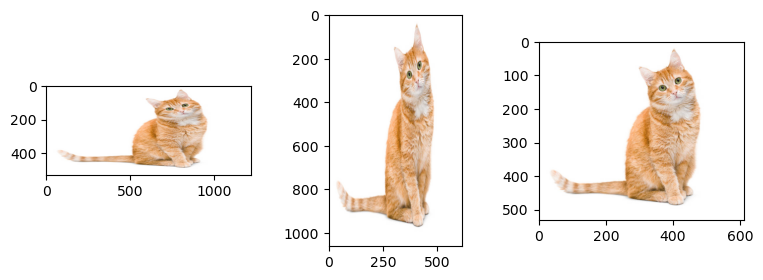

In [22]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("cat.jpg")
resized = cv2.resize(image,None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
resized2 = cv2.resize(image,None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(resized2,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

## Image Translation (Shifting)
Image translation shifts an image’s position horizontally or vertically without changing its shape or size. It’s useful for moving objects in an image or for alignment tasks in image processing. This code shifts the image 50 pixels left and 200 pixels down using an affine transformation matrix M. cv2.warpAffine() applies this shift, and the original and shifted images are shown side by side. Translation matrix M = [[1, 0, shiftX], [0, 1, shiftY]] shifts image by (X, Y).

rows, cols = original.shape[:2] gets the image’s height (rows) and width (cols) from its shape, which is needed to tell OpenCV how big the output should be. M = np.float32([[1, 0, -50], [0, 1, 200]]) creates a 2×3 translation matrix in float32 format, the 1 and 0 keep the scale and rotation unchanged, while -50 shifts the image 50 pixels left (x-direction) and 200 shifts it 200 pixels down (y-direction). shifted = cv2.warpAffine(original, M, (rows, cols)) applies this matrix to the image to create a new, shifted version with the same size as the original.

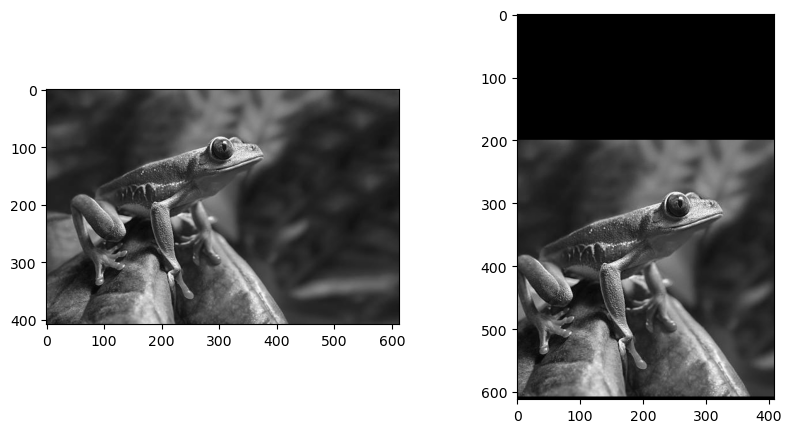

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
original = cv2.imread("frog_copy.jpg")
rows, cols = original.shape[:2]
M = np.float32([[1,0,-50],[0,1,200]])
shifted = cv2.warpAffine(original, M, (rows,cols))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(original,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(shifted,cmap="gray")

## Image Rotation
Rotation turns an image around a defined point (usually its center) by a specific angle. This is useful for correcting orientation, data augmentation, or aligning objects in computer vision tasks.

The code loads the image and gets its height and width with shape[:2]. The center is set to the middle of the image so it rotates around its center point. cv2.getRotationMatrix2D(center, 180, 1) creates a rotation matrix to rotate the image 180 degrees with no scaling. cv2.warpAffine applies this matrix to produce the rotated image, which is then displayed next to the original for comparison.

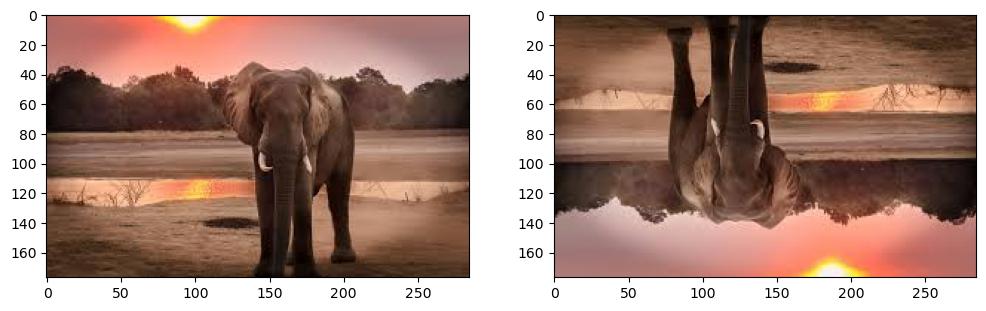

In [24]:
org = cv2.imread("elephant.jpeg")
(h,w) = org.shape[:2]
center = (w // 2 , h //2 )
M = cv2.getRotationMatrix2D(center, 180, 1)
rotated = cv2.warpAffine(org, M, (w,h))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(org,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB))

## Applying Custom Kernel Filtering Using cv2.filter2D
In image processing, filtering is used to enhance or detect features in an image by convolving it with a kernel (filter matrix). The cv2.filter2D function allows applying any custom kernel to an image, enabling effects like blurring, sharpening, edge detection, etc. Here, a simple averaging kernel is used to blur the image by smoothing pixel values.

kernal = np.ones((5,5), np.float32) / 30 Creates a 5x5 kernel filled with values summing approximately to 1/30 each, used to average nearby pixel values and blur the image. filterd = cv2.filter2D(N, -1, kernal) Applies the custom kernel to the image N using convolution; -1 keeps the output image depth the same as the input.

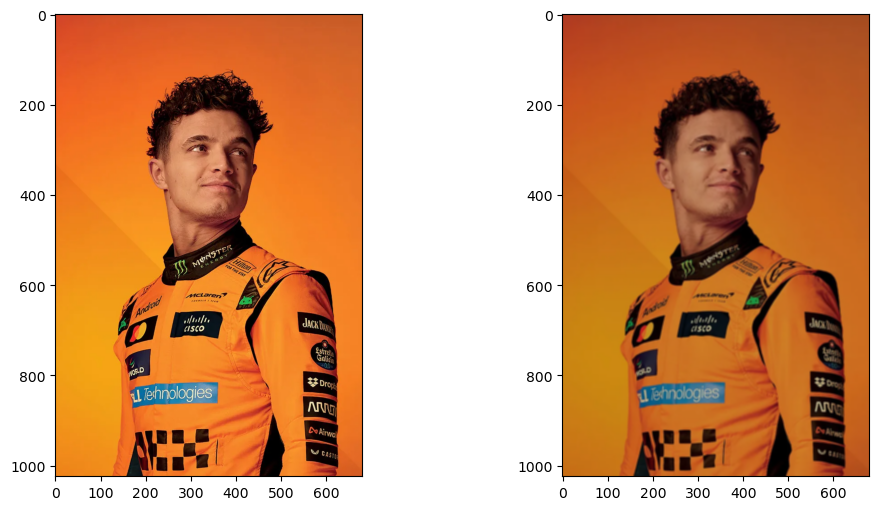

In [25]:
N = cv2.imread("norris.webp")
kernal = np.ones((5,5), np.float32) / 30
filterd = cv2.filter2D(N, -1, kernal)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(N, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(filterd, cv2.COLOR_BGR2RGB))

## Image Sharpening Using a Custom KerneL
Sharpening enhances the edges and fine details in an image by emphasizing differences in neighboring pixel intensities. This is done by applying a sharpening kernel that highlights high-frequency components. kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32): define the sharpening kernel matrix

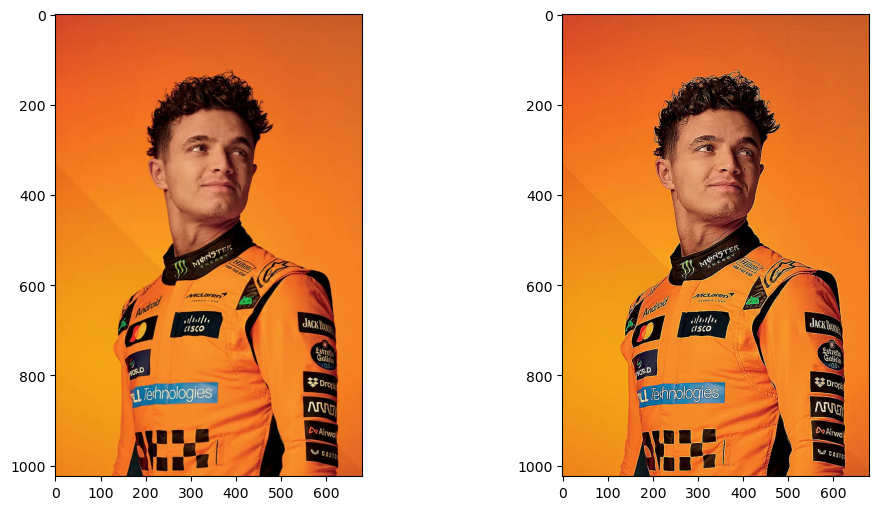

In [26]:
N = cv2.imread("norris.webp")
kernal = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],np.float32)
sharpered = cv2.filter2D(N, -1, kernal)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(N, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(sharpered, cv2.COLOR_BGR2RGB))

## Sobel Edge Detection
Sobel operator is used to detect edges by calculating image intensity gradients in the horizontal (x) and vertical (y) directions. This helps highlight edges where intensity changes sharply. The cv2.Sobel() function calculates the gradient of the image intensity in a specific direction, horizontal when (1, 0) and vertical when (0, 1). Using cv2.CV_64F as the output depth allows negative gradient values to be captured without clipping. Since gradients can have negative and large values, cv2.convertScaleAbs() converts them to absolute 8-bit values suitable for display. Finally, cv2.addWeighted() combines the horizontal and vertical gradients with equal weights to produce a balanced edge image highlighting edges in all directions.

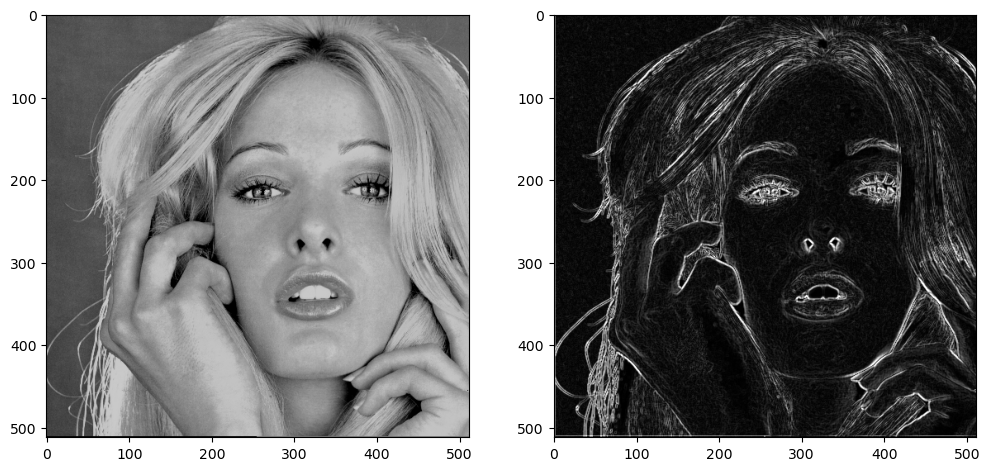

In [27]:
img = cv2.imread("woman_blonde.tif")
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
edge_image = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img , cmap= "gray")
plt.subplot(1,2,2)
plt.imshow(edge_image , cmap= "gray")

## Image Noise Reduction Using Median and Gaussian Blur Filters
Median blur is a non-linear filter that replaces each pixel with the median value from its neighborhood, effectively removing salt-and-pepper noise without blurring edges. Gaussian blur, on the other hand, is a linear filter that applies a weighted average based on a Gaussian distribution, producing a smooth and natural blur that reduces random noise and fine details.

Median bur is applied using cv2.medianBlur(img, ksize), where ksize is an odd positive integer like 3, 5, or 7, defining the neighborhood for median calculation to remove impulse noise. Gaussian blur uses cv2.GaussianBlur(img, (kx, ky), sigmaX), with (kx, ky) as an odd-sized kernel (e.g., (3,3), (5,5)) and sigmaX as the standard deviation; setting sigmaX to 0 lets OpenCV compute it automatically. These parameters control the strength of noise reduction and smoothing.

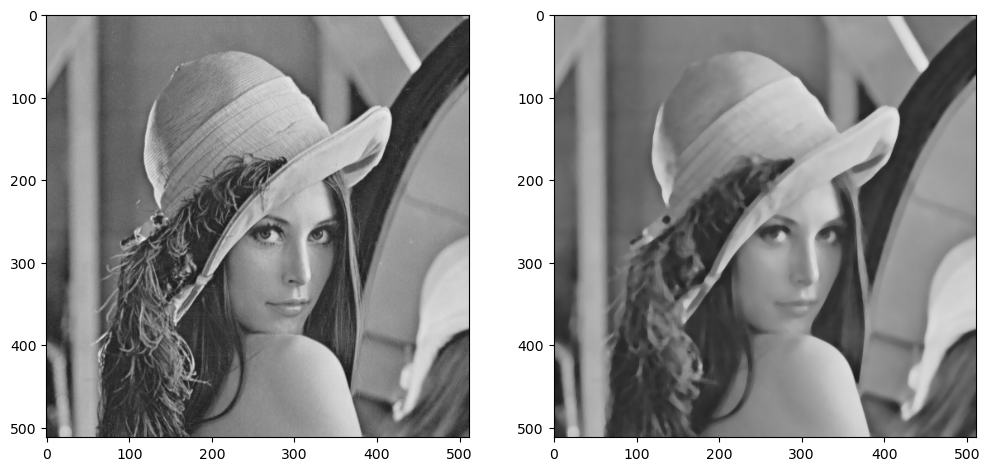

In [28]:
img = cv2.imread("lena_gray_512.tif")
median = cv2.medianBlur(img, 7)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))

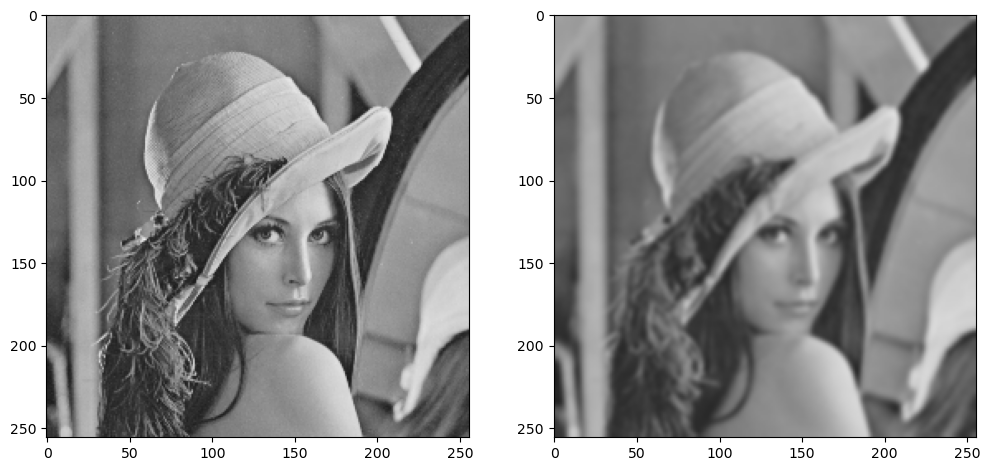

In [29]:
img = cv2.imread("lena_gray_256.tif")
blurred = cv2.GaussianBlur(img, (7, 7), 0)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))

# Basic ML Algorithms for image classification

## Logistic Regression

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [31]:
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples=30, go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat = 1 / (1 + np.exp(-1 * (w2 * self.x + b2)))
                Z[count1, count2] = -1 * np.mean(self.y * np.log(yhat + 1e-16) + (1 - self.y) * np.log(1 - yhat + 1e-16))
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    def set_para_loss(self, model, loss):
        self.n += 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    def final_plot(self):
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    def plot_ps(self):
        plt.subplot(121)
        plt.plot(self.x[self.y == 0], self.y[self.y == 0], 'ro')
        plt.plot(self.x[self.y == 1], self.y[self.y == 1] - 1, 'o')
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')

In [32]:
def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg:
        plt.legend()

In [33]:
torch.manual_seed(0)

In [34]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [35]:
data_set = Data()

x = tensor([-1.]),  y = tensor([0.])
x = tensor([-0.9000]),  y = tensor([0.])


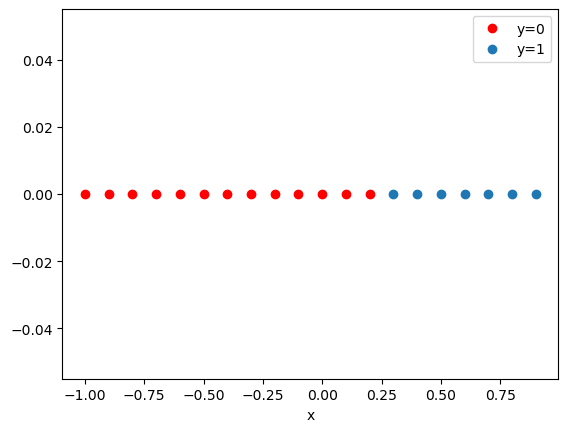

In [36]:
data_set.x
data_set.y
len(data_set)
x,y = data_set[0]
print("x = {},  y = {}".format(x,y))
x,y = data_set[1]
print("x = {},  y = {}".format(x,y))
plt.plot(data_set.x[data_set.y==0], data_set.y[data_set.y==0], 'ro', label="y=0")
plt.plot(data_set.x[data_set.y==1], data_set.y[data_set.y==1]-1, 'o', label="y=1")
plt.xlabel('x')
plt.legend()   

In [37]:
class logistic_regression(nn.Module):
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [38]:
x,y = data_set[0]
len(x)

1

In [39]:
model = logistic_regression(1)
criterion= nn.BCELoss()
batch_size = 10
trainloader = DataLoader(dataset=data_set, batch_size=batch_size)

In [40]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<Figure size 640x480 with 0 Axes>

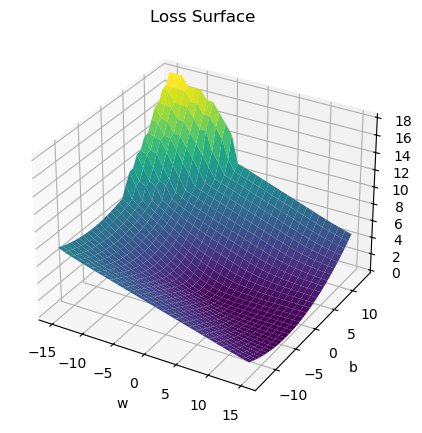

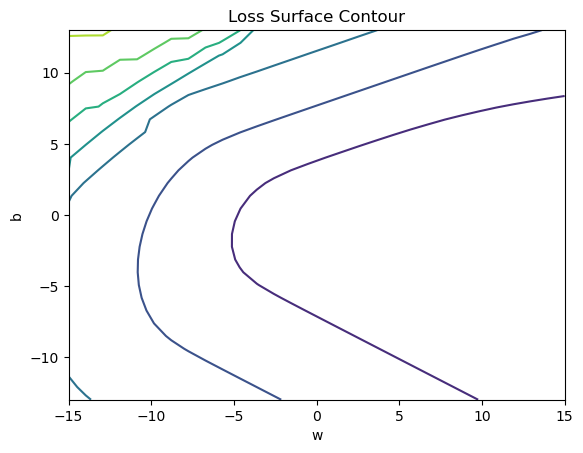

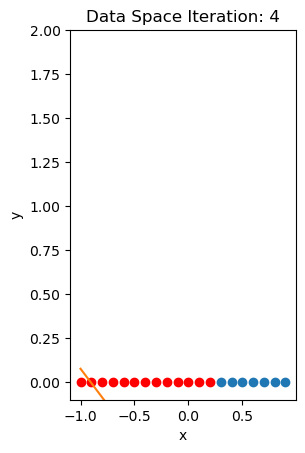

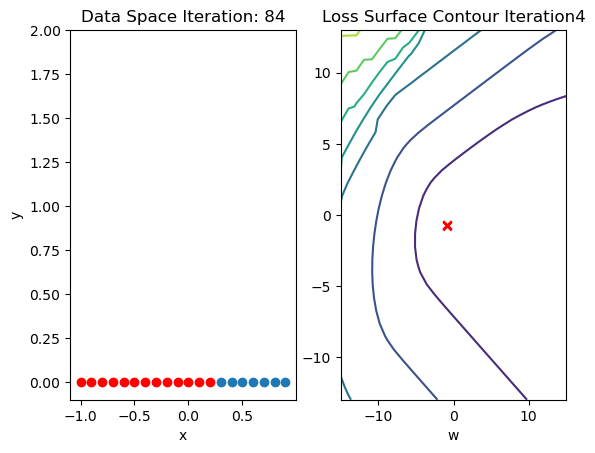

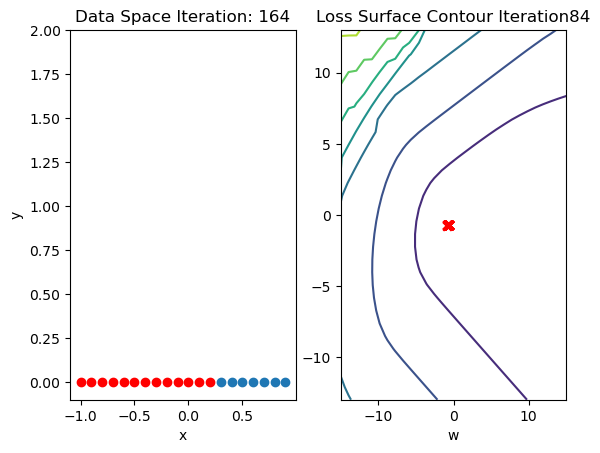

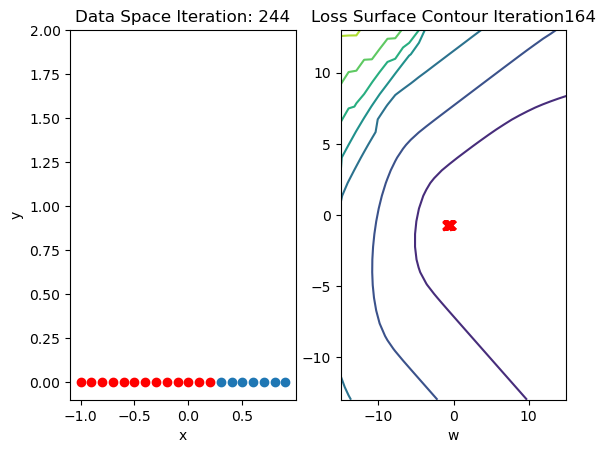

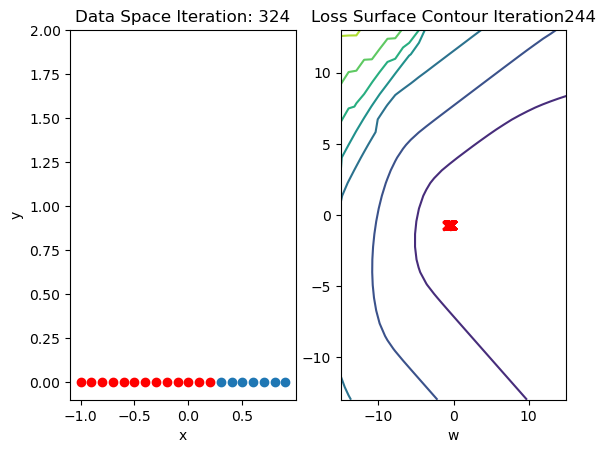

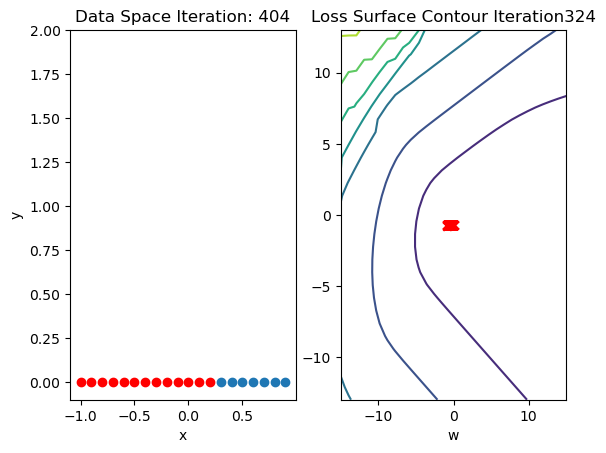

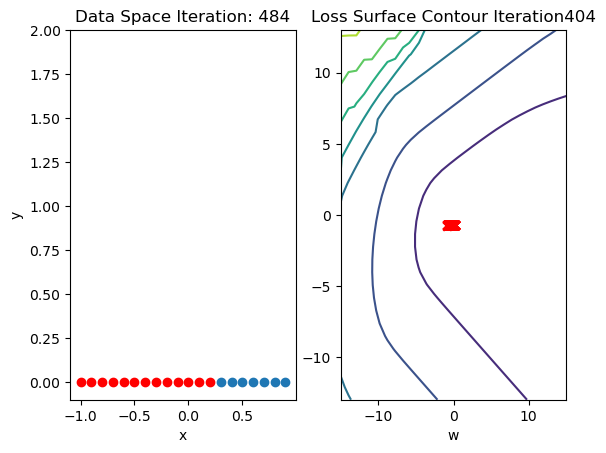

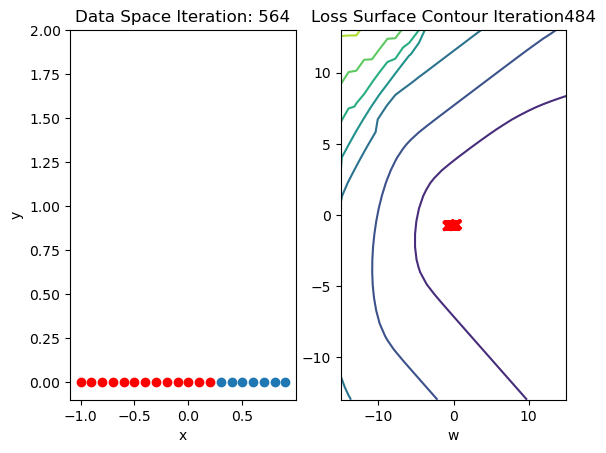

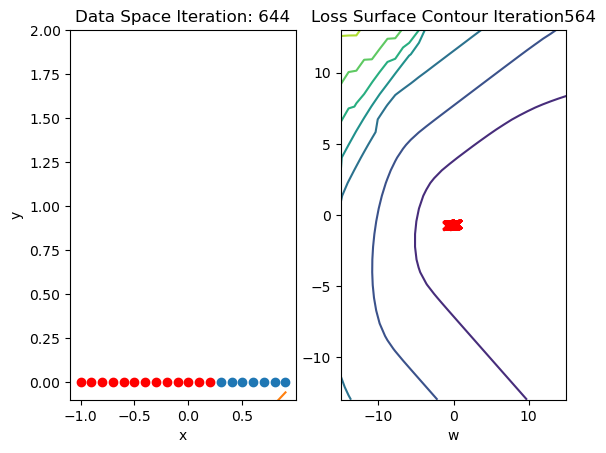

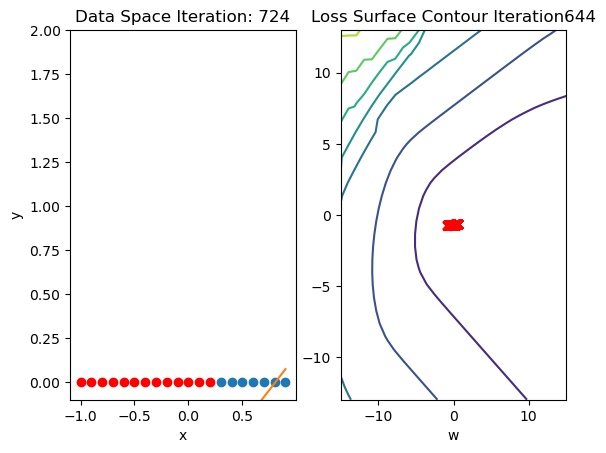

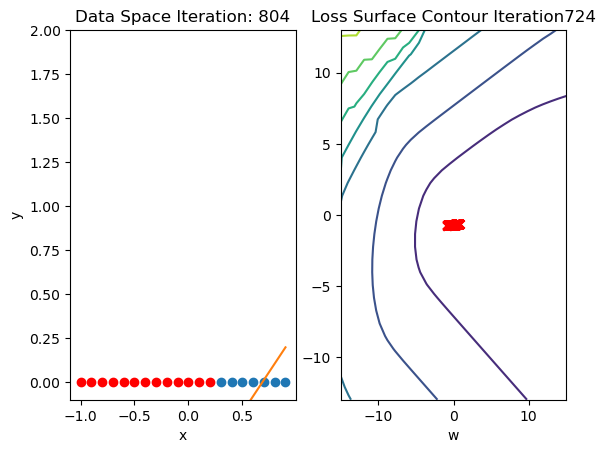

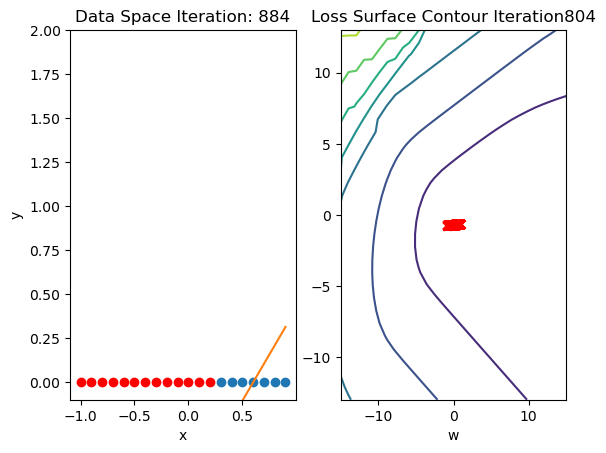

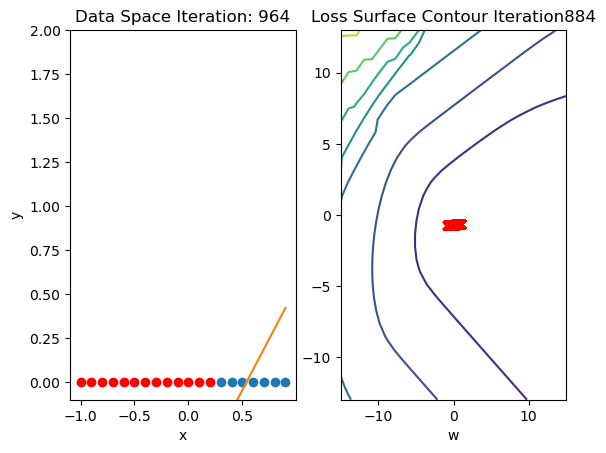

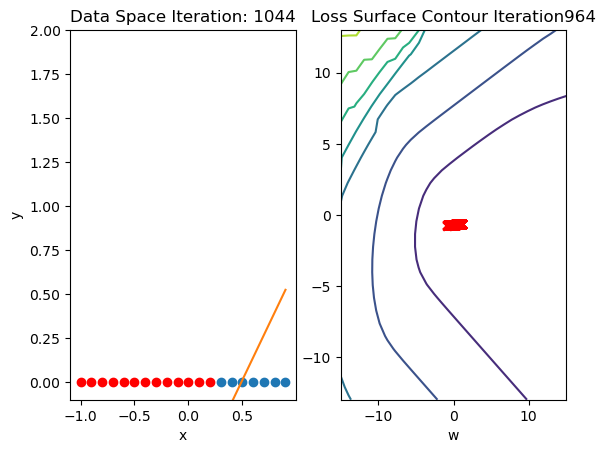

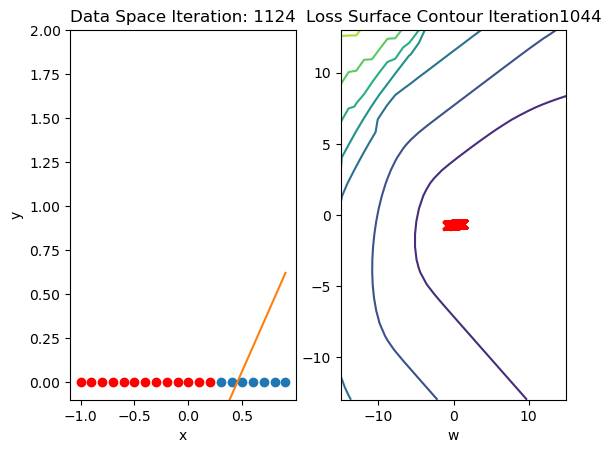

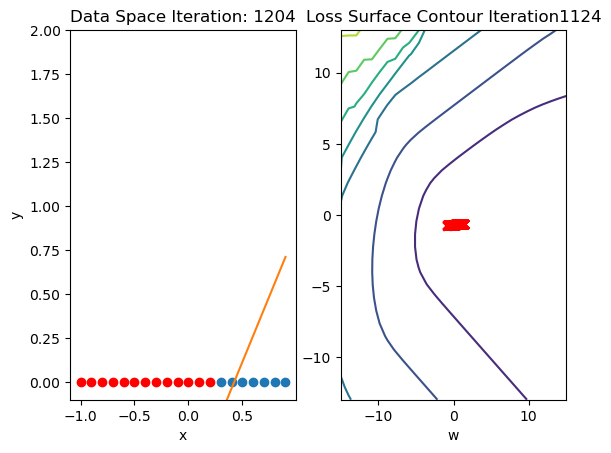

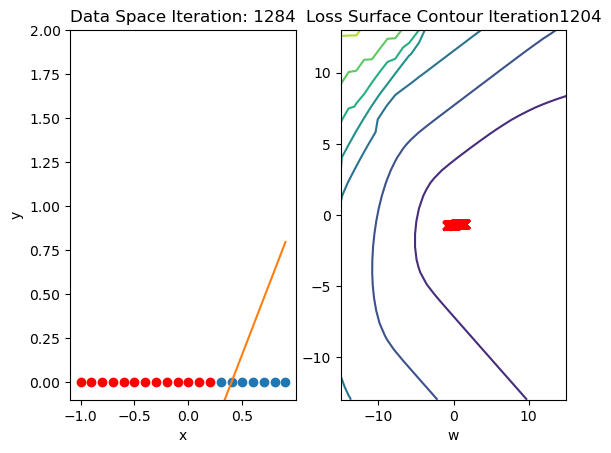

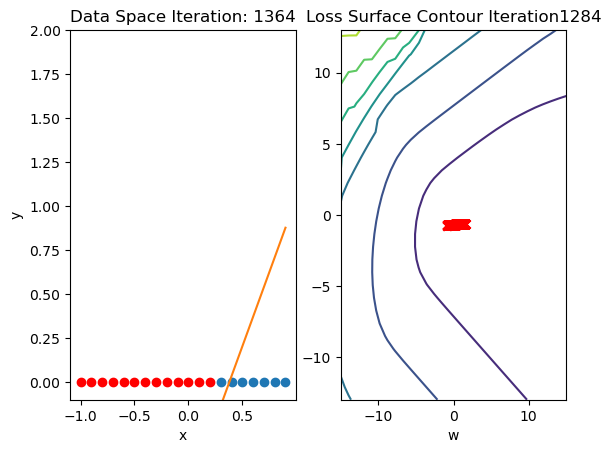

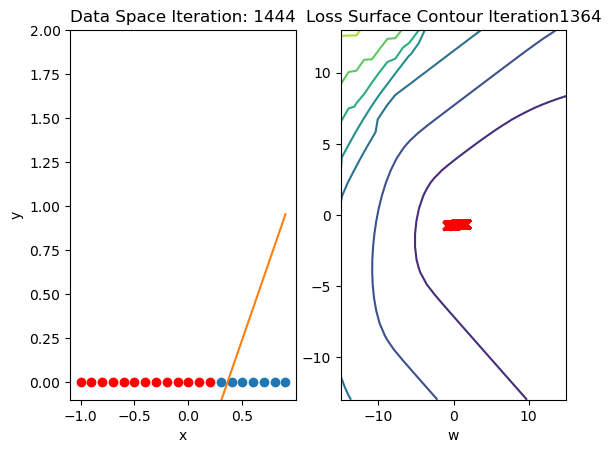

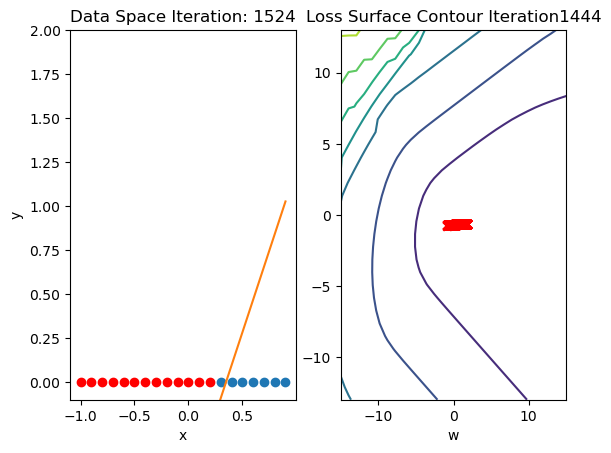

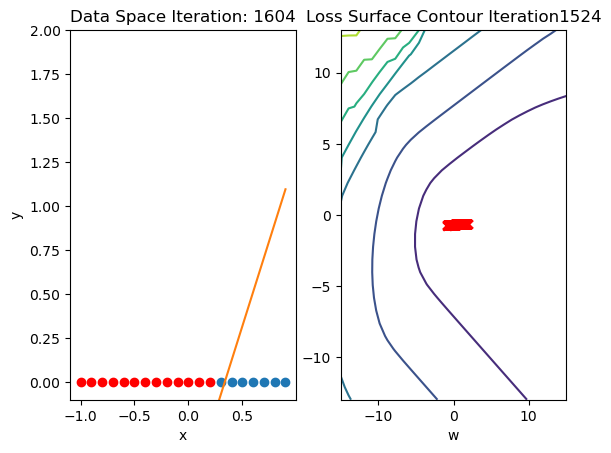

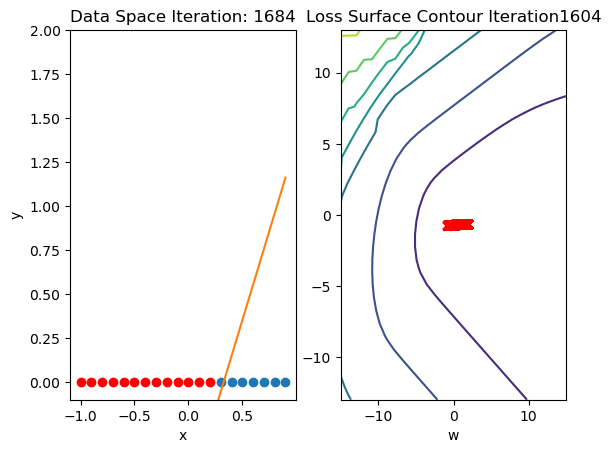

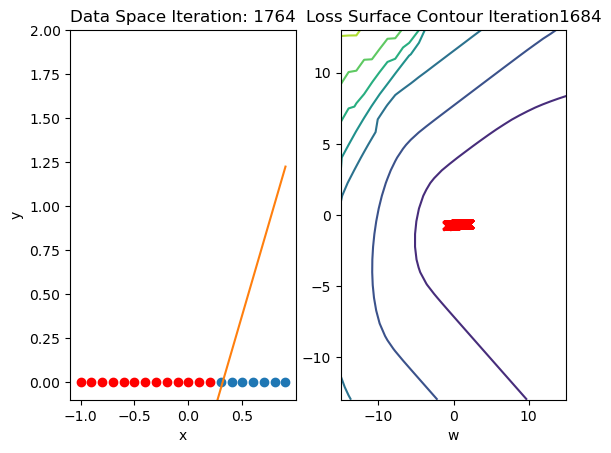

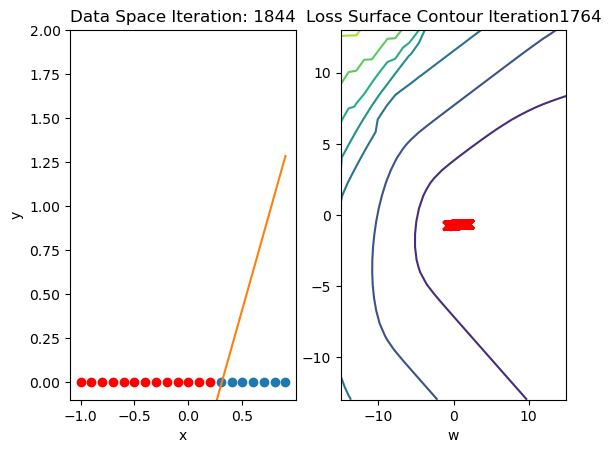

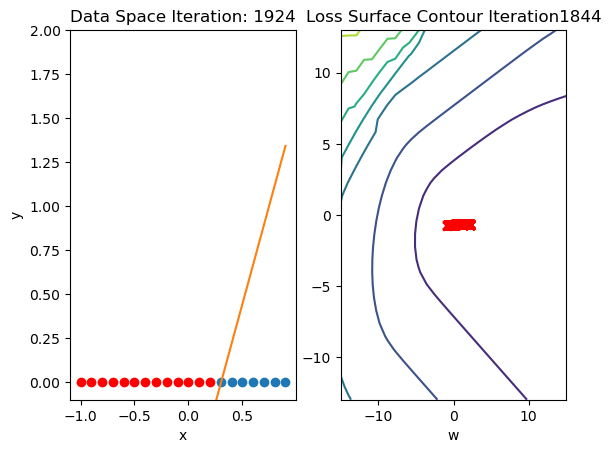

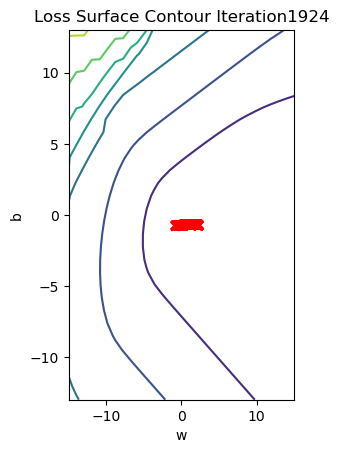

In [41]:
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)
model = logistic_regression(1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset=data_set, batch_size=5)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 500
loss_values = []
for epoch in range(epochs):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        get_surface.set_para_loss(model, loss.tolist())
        loss_values.append(loss)
    if epoch % 20 == 0:
        get_surface.plot_ps()

In [42]:
w = model.state_dict()['linear.weight'].data[0]
b = model.state_dict()['linear.bias'].data[0]
print("w = ", w, "b = ", b)

w =  tensor([2.3160]) b =  tensor(-0.6895)


In [43]:
yhat = model(data_set.x)
yhat = torch.round(yhat)
correct = 0
for prediction, actual in zip(yhat, data_set.y):
    if prediction == actual:
        correct += 1
print("Accuracy: ", correct / len(data_set) * 100, "%")

Accuracy:  100.0 %


Text(0, 0.5, 'Cost')

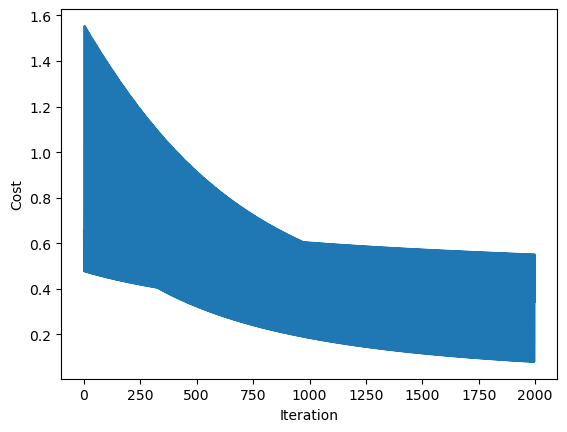

In [44]:
LOSS_BGD1 = []
for i in loss_values:
    LOSS_BGD1.append(i.item())
plt.plot(LOSS_BGD1)
plt.xlabel("Iteration")
plt.ylabel("Cost")

## Stochastic Gradient Descent

<Figure size 640x480 with 0 Axes>

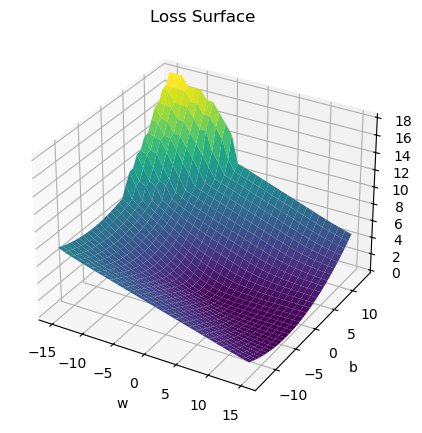

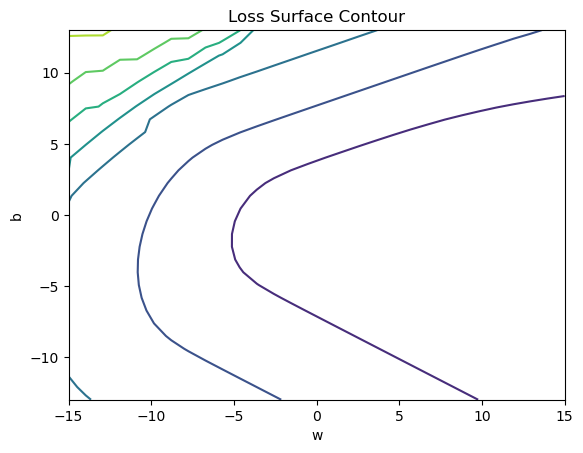

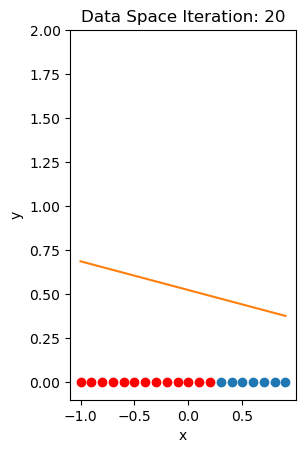

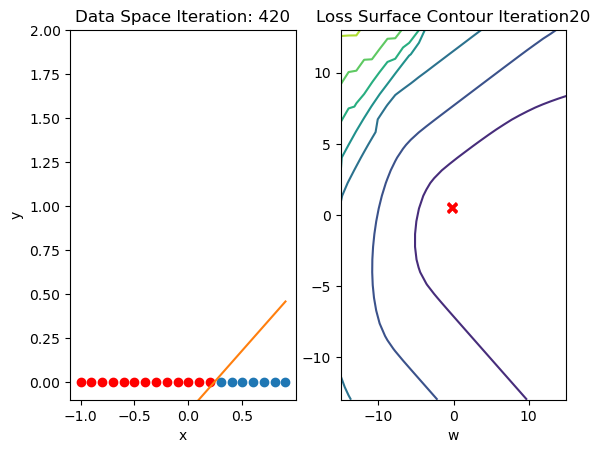

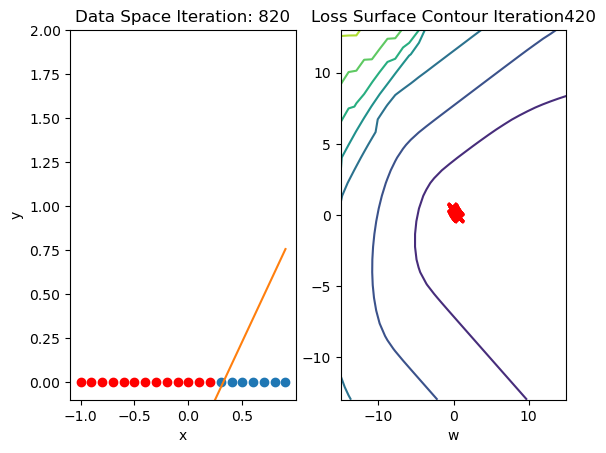

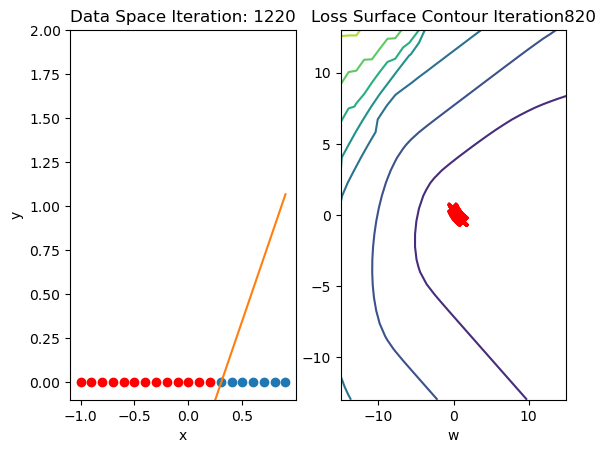

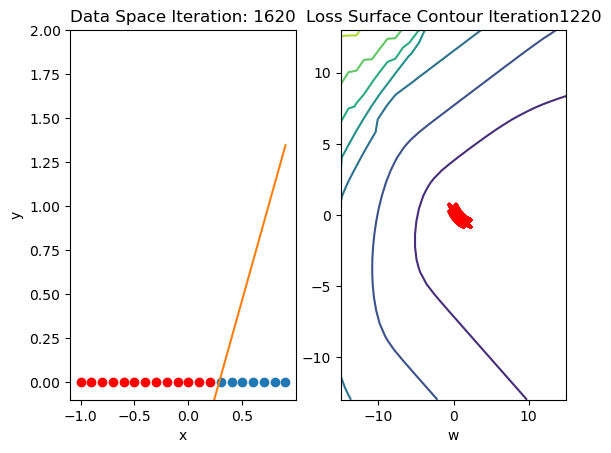

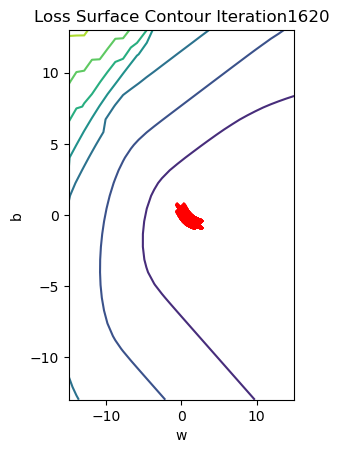

In [45]:
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)
model = logistic_regression(1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset=data_set, batch_size=1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 100
loss_values = []
for epoch in range(epochs):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        get_surface.set_para_loss(model, loss.tolist())
        loss_values.append(loss)
    if epoch % 20 == 0:
        get_surface.plot_ps()

In [46]:
w = model.state_dict()['linear.weight'].data[0]
b = model.state_dict()['linear.bias'].data[0]
print("w = ", w, "b = ", b)

w =  tensor([2.5085]) b =  tensor(-0.6814)


In [47]:
yhat = model(data_set.x)
yhat = torch.round(yhat)
correct = 0
for prediction, actual in zip(yhat, data_set.y):
    if prediction == actual:
        correct += 1
print("Accuracy: ", correct / len(data_set) * 100, "%")

Accuracy:  100.0 %


Text(0, 0.5, 'Cost')

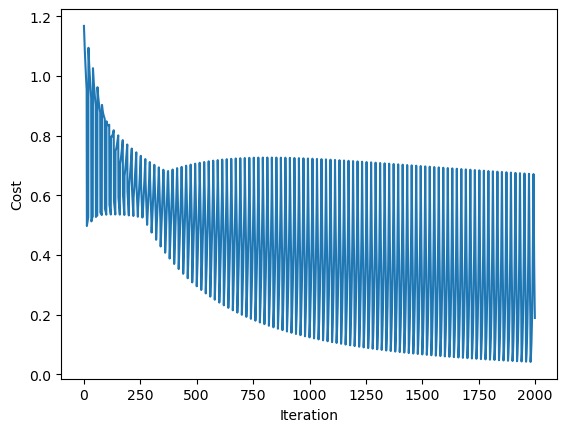

In [48]:
LOSS_BGD1 = []
for i in loss_values:
    LOSS_BGD1.append(i.item())
plt.plot(LOSS_BGD1)
plt.xlabel("Iteration")
plt.ylabel("Cost")

<Figure size 640x480 with 0 Axes>

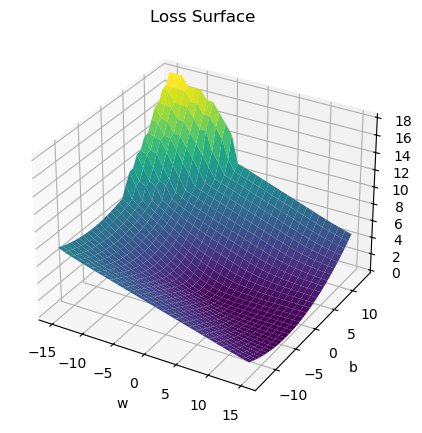

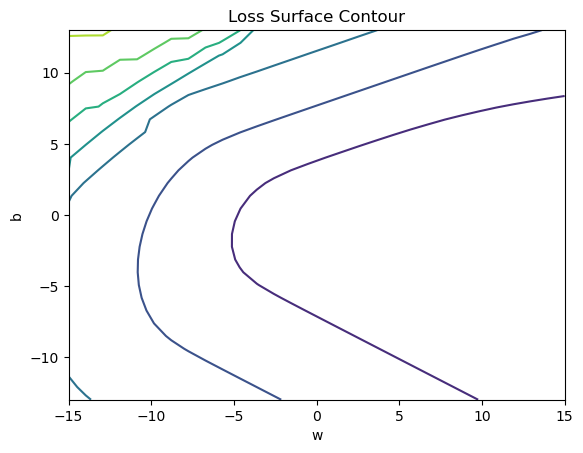

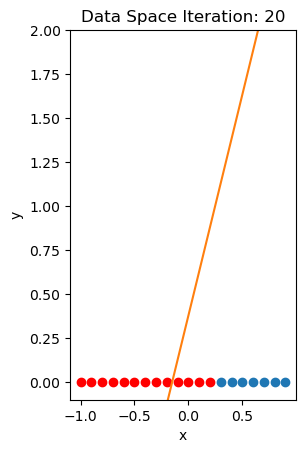

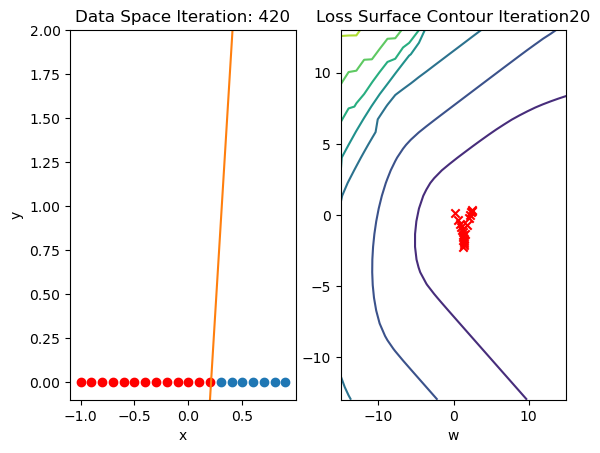

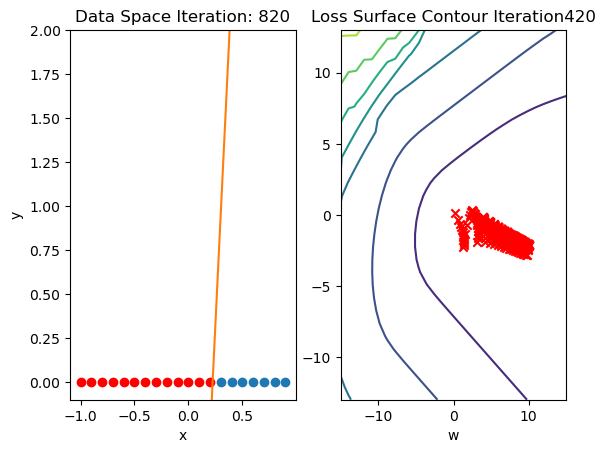

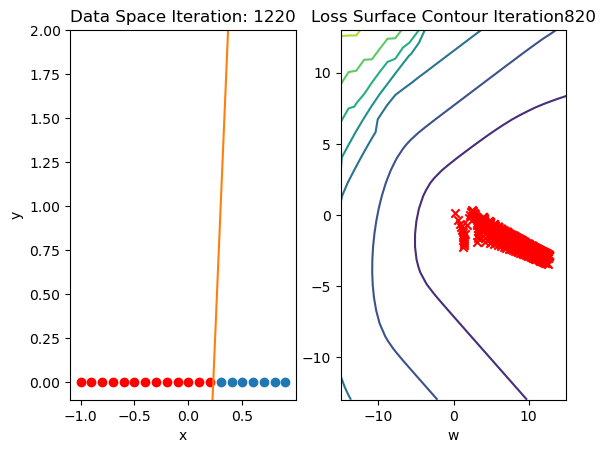

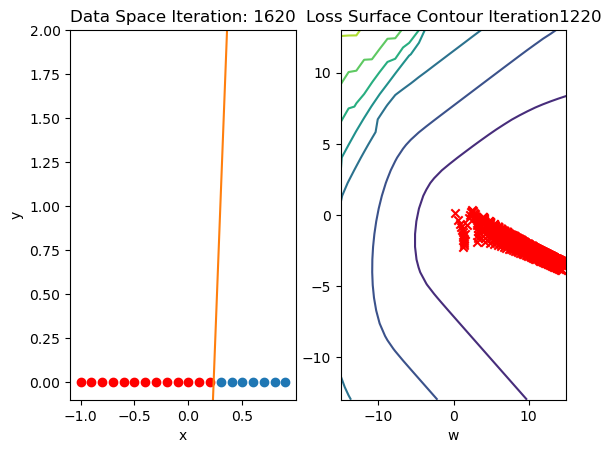

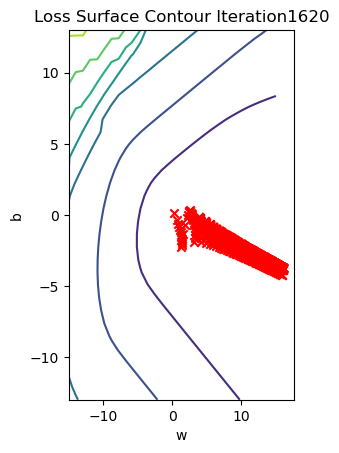

In [49]:
get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)
model = logistic_regression(1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset=data_set, batch_size=1)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
epochs = 100
loss_values = []
for epoch in range(epochs):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        get_surface.set_para_loss(model, loss.tolist())
        loss_values.append(loss)
    if epoch % 20 == 0:
        get_surface.plot_ps()

In [50]:
w = model.state_dict()['linear.weight'].data[0]
b = model.state_dict()['linear.bias'].data[0]
print("w = ", w, "b = ", b)

w =  tensor([17.3061]) b =  tensor(-4.0862)


In [51]:
yhat = model(data_set.x)
yhat = torch.round(yhat)
correct = 0
for prediction, actual in zip(yhat, data_set.y):
    if prediction == actual:
        correct += 1
print("Accuracy: ", correct / len(data_set) * 100, "%")

Accuracy:  100.0 %


Text(0, 0.5, 'Cost')

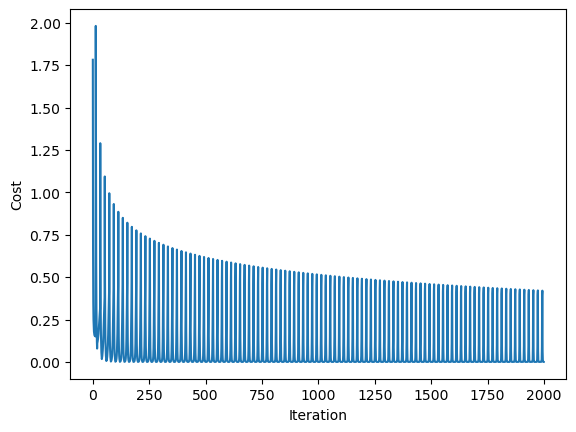

In [52]:
LOSS_BGD1 = []
for i in loss_values:
    LOSS_BGD1.append(i.item())
plt.plot(LOSS_BGD1)
plt.xlabel("Iteration")
plt.ylabel("Cost")